# Dask Distribuido

<ul>
<li type="square"><strong>Dask.distributed es un programador de tareas dinámico, distribuido y administrado centralmente. El proceso del programador de dask central coordina las acciones de varios procesos de trabajo de dask distribuidos en varias máquinas y las solicitudes simultáneas de varios clientes.</strong></li>

<ul>
<li type="square"><strong>Dask Distributed sirve para cubrir las siguientes necesidades:</strong></li>

<br>
<li type="circle"> Baja latencia: cada tarea sufre alrededor de 1 ms de sobrecarga. Un pequeño cómputo y un viaje de ida y vuelta a la red pueden completarse en menos de 10 ms. </li>

<br>
<li type="circle"> Intercambio de datos entre pares: los trabajadores se comunican entre sí para compartir datos. Esto elimina los cuellos de botella centrales para la transferencia de datos.</li>

<br>
<li type="circle"> Programación compleja: Admite flujos de trabajo complejos (no solo mapear/filtrar/reducir) que son necesarios para algoritmos sofisticados utilizados en matrices nd-arrays, aprendizaje automático, procesamiento de imágenes y estadísticas.</li>

<br>
<li type="circle"> Python puro: Construido en Python utilizando tecnologías conocidas. Esto facilita la instalación, mejora la eficiencia (para usuarios de Python) y simplifica la depuración.</li>

<br>
<li type="circle"> Localidad de datos: los algoritmos de programación ejecutan hábilmente cálculos donde residen los datos. Esto minimiza el tráfico de red y mejora la eficiencia.</li>

<br>
<li type="circle"> API familiar: compatible con la API concurrent.futures en la biblioteca estándar de Python. Compatible con dask API para algoritmos paralelos</li>

<br>
<li type="circle"> Fácil configuración: como un paquete de Pure Python distribuido, es instalable por pip y fácil de configurar en su propio clúster.</li> 

## Codigo: pequeño ejemplo de manejo de un cluster local con Dask

In [1]:
# Librerias
import numpy as np
import pandas as pd
import urllib
import os

import dask
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
%matplotlib inline

import xarray as xr

Inicializamos Client

Notar: Client es el principal punto de entrada para los usuarios de dask.distributed.

In [2]:
from distributed import Client

Luego iniciaremos un clúster DASK localmente:

In [3]:
from dask.distributed import LocalCluster
cluster = LocalCluster()

Conectando Client con el cluster:

In [4]:
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 11.79 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:49317,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 11.79 GiB
Comm: tcp://127.0.0.1:49353,Total threads: 2
Dashboard: http://127.0.0.1:49354/status,Memory: 2.95 GiB
Nanny: tcp://127.0.0.1:49323,


Haga clic en el enlace del panel y se abrirá una nueva pestaña del navegador para el panel de control. Eso es todo, tenemos un clúster en funcionamiento. Ahora veamos qué podemos hacer con él:

### Sample Computation

Abriendo un conjunto de datos de muestra con xarray:

In [5]:
ds = xr.tutorial.open_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Calcule el promedio de tiempo. Esto se hace perezosamente por lo que es muy rápido. En este punto no se han realizado cálculos.

In [6]:
temp_mean = ds['air'].mean(dim=['time'])

Solicitar valores numéricos o gráficos activará el cálculo en el cluster. Es hora de revisar el tablero de DASK

CPU times: total: 93.8 ms
Wall time: 292 ms


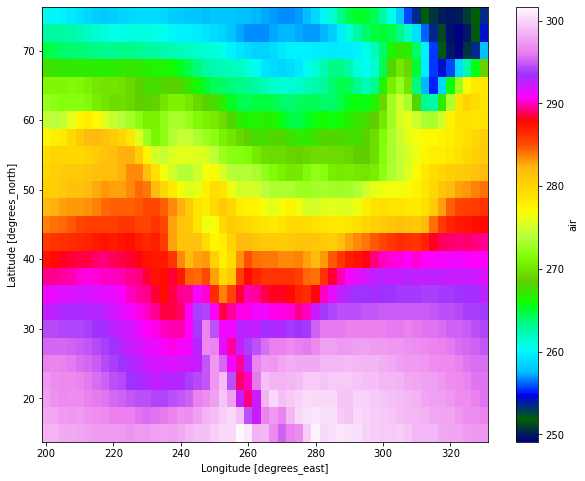

In [7]:
%time temp_mean.plot(figsize=[10,8], cmap='gist_ncar')

Una vez terminado, podemos apagar el clúster y el Client:

In [8]:
cluster.close()
client.close()